In [1]:
#import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the Excel file
dfdiwali=pd.read_excel("C:/Users/saroj/Desktop/diwali/diwali_sale_data.xlsx")

In [3]:
dfdiwali

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [4]:
dfdiwali.shape

(11251, 15)

##### DATA CLEANING PROCESS:

In [5]:
#to check first five rows
dfdiwali.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
#to check blank columns and data type
dfdiwali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
#delete all the blank columns
dfdiwali.drop(["Status", "unnamed1"], axis = 1, inplace = True)

In [8]:
dfdiwali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [9]:
#to check null values
pd.isnull(dfdiwali).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
dfdiwali.shape

(11251, 13)

In [11]:
#to delete all the null values
dfdiwali.dropna(inplace=True)

In [12]:
#replece Marital_Status=1 as "Married" and Marital_Status == 0 as "Unmarried foe better understanding
dfdiwali.loc[dfdiwali.Marital_Status == 1,"Marital_Status"]="Married"
dfdiwali.loc[dfdiwali.Marital_Status == 0,"Marital_Status"]="Unmarried"

In [13]:
#create "price_per_order" column
dfdiwali["price_per_order"]=(dfdiwali.Amount/dfdiwali.Orders).astype(int)

In [14]:
dfdiwali

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,price_per_order
0,1002903,Sanskriti,P00125942,F,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0,23952
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,7978
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,7974
3,1001425,Sudevi,P00237842,M,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0,11956
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0,11938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370.0,92
11247,1004089,Reichenbach,P00171342,M,26-35,33,Unmarried,Haryana,Northern,Healthcare,Veterinary,3,367.0,122
11248,1001209,Oshin,P00201342,F,36-45,40,Unmarried,Madhya Pradesh,Central,Textile,Office,4,213.0,53
11249,1004023,Noonan,P00059442,M,36-45,37,Unmarried,Karnataka,Southern,Agriculture,Office,3,206.0,68


In [15]:
dfdiwali.shape

(11239, 14)

In [16]:
#change the datatype from float to integer
dfdiwali["Amount"]=dfdiwali["Amount"].astype("int")

In [17]:
dfdiwali

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,price_per_order
0,1002903,Sanskriti,P00125942,F,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952,23952
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934,7978
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924,7974
3,1001425,Sudevi,P00237842,M,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912,11956
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877,11938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370,92
11247,1004089,Reichenbach,P00171342,M,26-35,33,Unmarried,Haryana,Northern,Healthcare,Veterinary,3,367,122
11248,1001209,Oshin,P00201342,F,36-45,40,Unmarried,Madhya Pradesh,Central,Textile,Office,4,213,53
11249,1004023,Noonan,P00059442,M,36-45,37,Unmarried,Karnataka,Southern,Agriculture,Office,3,206,68


In [18]:
#to get number of unique users
dfdiwali.User_ID.nunique()

3752

In [19]:
#create new dataframe
dfdiwali_unique=dfdiwali.groupby(["User_ID", "Gender","Age Group","Age","Marital_Status"])[["Amount","Orders"]].sum().reset_index()

In [20]:
dfdiwali_unique["price_per_order"]=(dfdiwali_unique.Amount/dfdiwali_unique.Orders).astype(int)

In [21]:
dfdiwali_unique

,User_ID,Gender,Age Group,Age,Marital_Status,Amount,Orders,price_per_order
0,1000001,F,0-17,13,Married,3977,1,3977
1,1000002,F,55+,56,Unmarried,7098,3,2366
2,1000003,F,26-35,33,Unmarried,12289,3,4096
3,1000003,F,26-35,35,Unmarried,11425,3,3808
4,1000004,F,46-50,47,Married,10072,2,5036
...,...,...,...,...,...,...,...,...
9811,1006039,M,46-50,48,Unmarried,5914,3,1971
9812,1006039,M,46-50,50,Unmarried,3890,3,1296
9813,1006040,F,26-35,27,Unmarried,34045,3,11348
9814,1006040,F,26-35,28,Married,20960,1,20960


In [22]:
#to check column types for further analysis
dfdiwali.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'price_per_order'],
      dtype='object')

##### EDA(Exploratory Data Analysis)

In [23]:
#describe()function return the mathematical description of the data in the dataframe(count,mean,std,min,percentile,max values etc)
dfdiwali.describe()

,User_ID,Age,Orders,Amount,price_per_order
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,2.489634,9453.610553,4957.120740
std,1.716039e+03,12.753866,1.114967,5222.355168,4207.419404
min,1.000001e+06,12.000000,1.000000,188.000000,53.000000
25%,1.001492e+06,27.000000,2.000000,5443.000000,2023.500000
50%,1.003064e+06,33.000000,2.000000,8109.000000,3824.000000
75%,1.004426e+06,43.000000,3.000000,12675.000000,6417.000000
max,1.006040e+06,92.000000,4.000000,23952.000000,23952.000000


In [24]:
#use describe() for specific columns
dfdiwali[["Age","Orders","Amount","price_per_order"]].describe()

,Age,Orders,Amount,price_per_order
count,11239.000000,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553,4957.120740
std,12.753866,1.114967,5222.355168,4207.419404
min,12.000000,1.000000,188.000000,53.000000
25%,27.000000,2.000000,5443.000000,2023.500000
50%,33.000000,2.000000,8109.000000,3824.000000
75%,43.000000,3.000000,12675.000000,6417.000000
max,92.000000,4.000000,23952.000000,23952.000000


In [25]:
# Exploratory Data Analysis
#Based on Gender 


In [26]:
dfdiwali.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'price_per_order'],
      dtype='object')

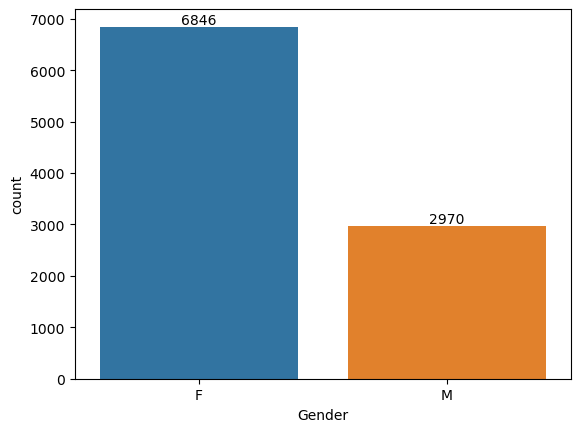

In [27]:
#plotting a bar graph for Gender and its count
gen=sns.countplot(x="Gender",data=dfdiwali_unique)
for bars in gen.containers:
    gen.bar_label(bars)

In [28]:
#to get total Amount foe each Gender
sales_gen=dfdiwali_unique.groupby(["Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=True)

In [29]:
sales_gen

,Gender,Amount
1,M,31913276
0,F,74335853


<Axes: xlabel='Gender', ylabel='Amount'>

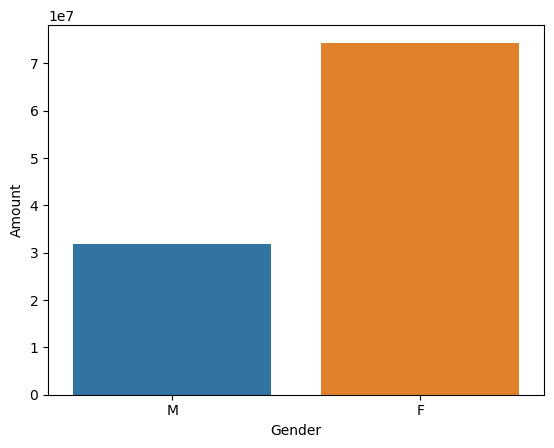

In [30]:
#plotting a bar graph for Gender vs Total Amount(spent)
sns.barplot(x="Gender",y="Amount",data=sales_gen)

In [31]:
#From the above graph we can conclude that most of the buyers are "Female".

In [32]:
#Based on Age
# for each age group getting the count of each Gender

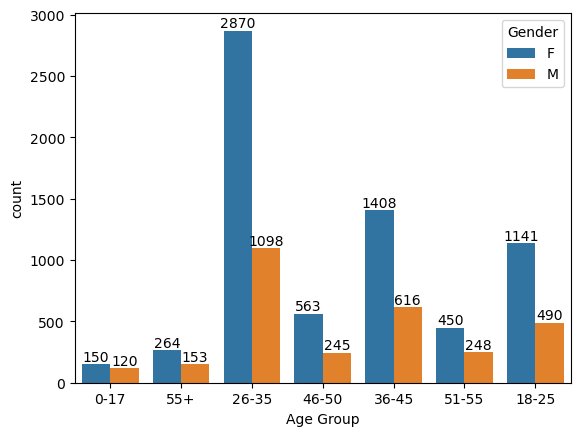

In [33]:
age=sns.countplot(data=dfdiwali_unique,x="Age Group",hue="Gender")
for bars in age.containers:
    age.bar_label(bars)

In [34]:
#to get total sales Amount based on each Age Group
sales_age=dfdiwali.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

In [35]:
sales_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

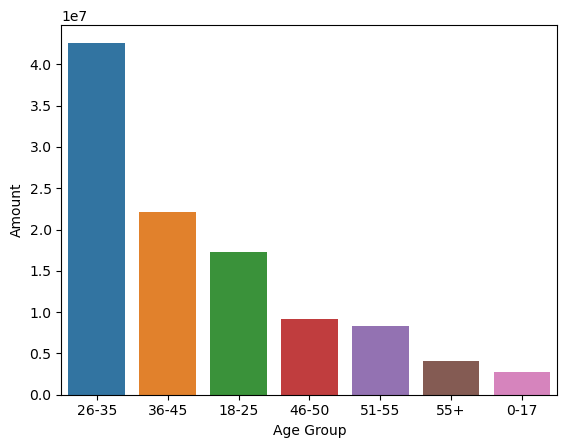

In [36]:
#Bar plot of Total Amount vs Age Group
sns.barplot(x="Age Group",y="Amount",data=sales_age)

In [37]:
#From the above graph we can conclude that most of the buyers are of Age Group between 26-35.

In [38]:
#State

In [39]:
#total number of orders from top 10 State
sales_state=dfdiwali.groupby(["State"], as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10).reset_index(drop=True)

In [40]:
sales_state

,State,Orders
0,Uttar Pradesh,4807
1,Maharashtra,3810
2,Karnataka,3240
3,Delhi,2740
4,Madhya Pradesh,2252
5,Andhra Pradesh,2051
6,Himachal Pradesh,1568
7,Kerala,1137
8,Haryana,1109
9,Gujarat,1066


<Axes: xlabel='State', ylabel='Orders'>

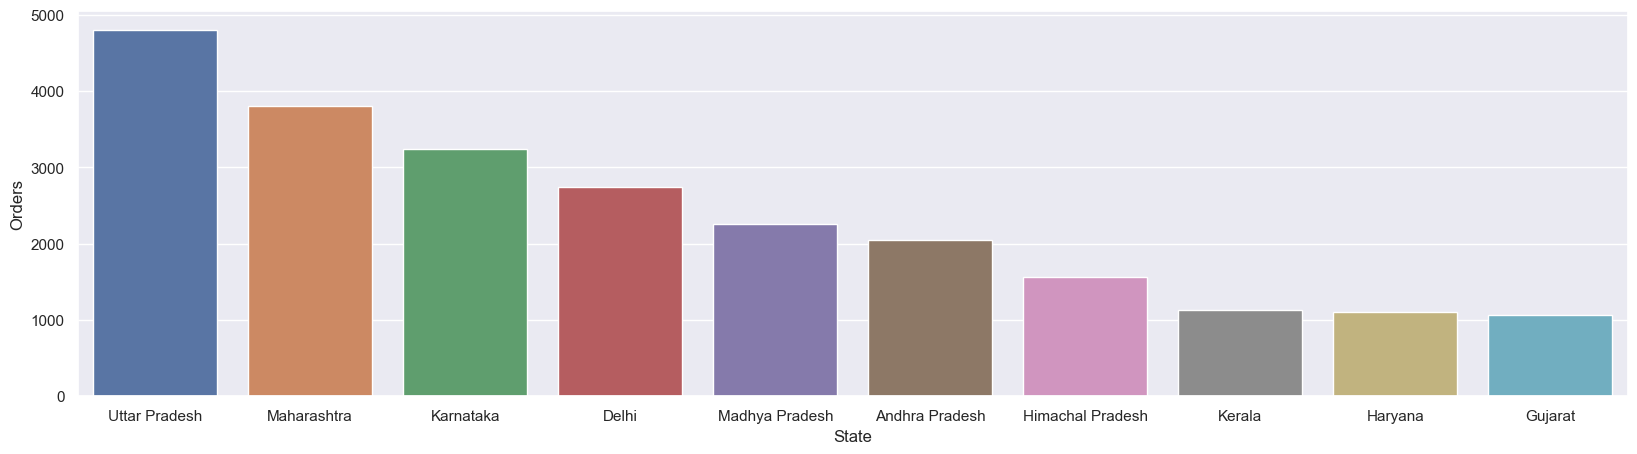

In [41]:
sns.set(rc={"figure.figsize":(20,5)})
sns.barplot(data=sales_state,x="State",y="Orders")


In [42]:
#To get top 5 states and for better understading used pie chart here.

In [43]:
#similar for top 5 States
sales_state=dfdiwali.groupby(["State"], as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(5).reset_index(drop=True)

In [44]:
sales_state

,State,Orders
0,Uttar Pradesh,4807
1,Maharashtra,3810
2,Karnataka,3240
3,Delhi,2740
4,Madhya Pradesh,2252


In [45]:
#created one exrtra column for Others in State so that we can clearly understand the number of orders from top five state and rest of the state in one single pie chart.
sales_state=pd.concat([sales_state,pd.DataFrame({'State':['Others'],'Orders':[dfdiwali.Orders.sum()-sales_state.Orders.sum()]})]).reset_index(drop=True)

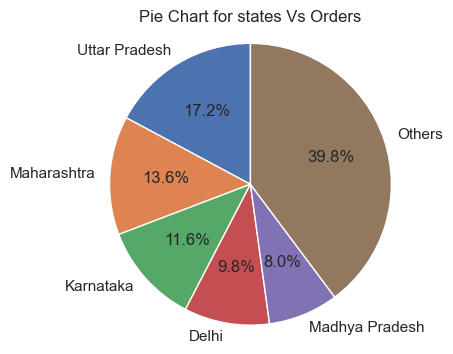

In [46]:
plt.figure(figsize=(4, 4))
plt.pie(sales_state['Orders'], labels=sales_state['State'], autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart for states Vs Orders')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Display the plot
plt.show()

In [47]:
#converting the state wise orders data into percentage for better understanding
total_sales=dfdiwali["Orders"].sum()
#defining the below function to calculate order percentage for each transaction
def convert_to_percentage(integer_value, total_sales):
    return (integer_value / total_sales) * 100
#applying the function for order column
dfdiwali['Order percentage'] = dfdiwali['Orders'].apply(lambda x: convert_to_percentage(x, total_sales))

In [48]:
sales_state=dfdiwali.groupby(["State"], as_index=False)["Order percentage"].sum().sort_values(by="Order percentage",ascending=False).head(5).reset_index()

In [49]:
sales_state

,index,State,Order percentage
0,14,Uttar Pradesh,17.179515
1,10,Maharashtra,13.616383
2,7,Karnataka,11.579286
3,2,Delhi,9.792359
4,9,Madhya Pradesh,8.048319


In [50]:
#Amount
#Total Amount from top 10 States
sales_state=dfdiwali.groupby(["State"], as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)

In [51]:
sales_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


<Axes: xlabel='State', ylabel='Amount'>

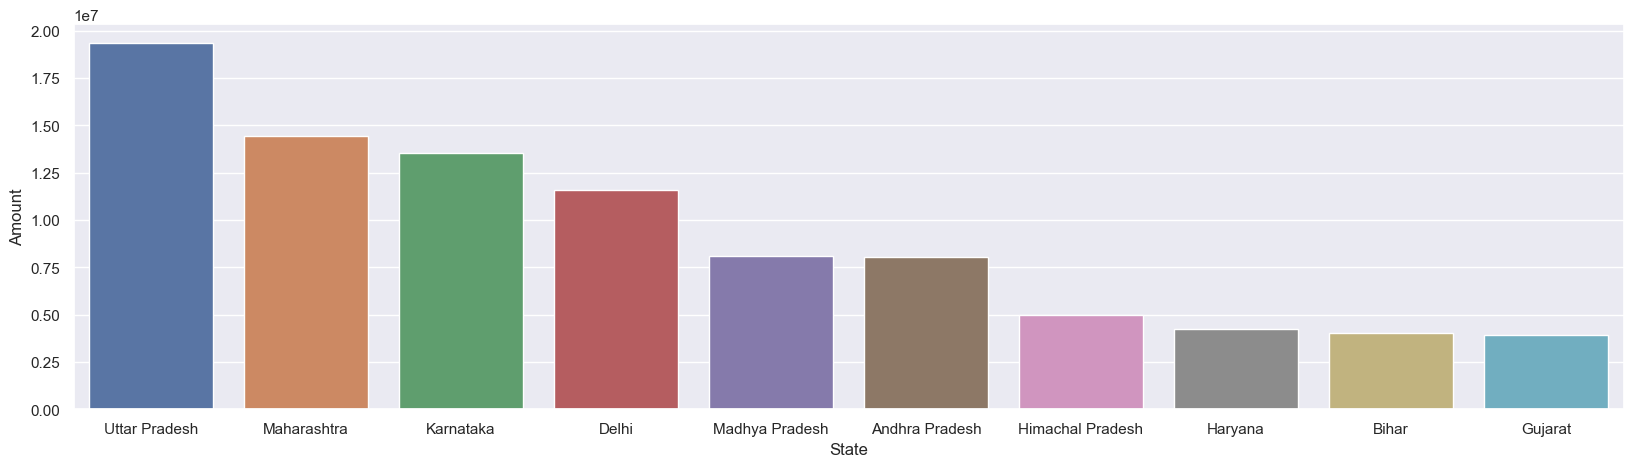

In [52]:
sns.set(rc={"figure.figsize":(20,5)})
sns.barplot(data=sales_state,x="State",y="Amount")


In [53]:
#to get the total amount for top 5 state
sales_state=dfdiwali.groupby(["State"], as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(5)

In [54]:
# creating a new column named others to keep the total amount for rest of state 
sales_state=pd.concat([sales_state,pd.DataFrame({'State':['Others'],'Amount':[dfdiwali.Amount.sum()-sales_state.Amount.sum()]})])

In [55]:
sales_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Others,39218118


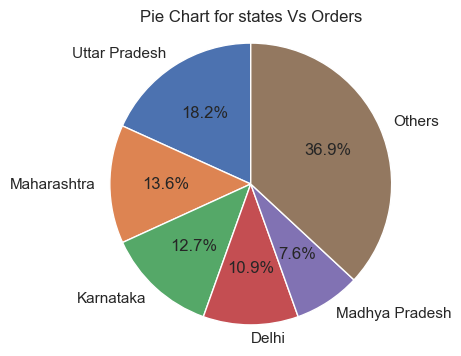

In [56]:
#plotting a pie chart for orders across states
plt.figure(figsize=(4, 4))
plt.pie(sales_state['Amount'], labels=sales_state['State'], autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart for states Vs Orders')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Display the plot
plt.show()

In [57]:
total_amount=dfdiwali["Amount"].sum()
#defining the below function to calculate percentage for each transaction amount
def convert_to_percentage(integer_value, total_amount):
    return (integer_value / total_amount) * 100
#applying the function for amount column
dfdiwali['Amount_percentage'] = dfdiwali['Amount'].apply(lambda x: convert_to_percentage(x, total_amount))

In [58]:
#to get the total amount percentage for top 5 state
sales_state=dfdiwali.groupby(["State"], as_index=False)["Amount_percentage"].sum().sort_values(by="Amount_percentage",ascending=False).head(5)

In [59]:
sales_state

,State,Amount_percentage
14,Uttar Pradesh,18.235413
10,Maharashtra,13.578975
7,Karnataka,12.728142
2,Delhi,10.921330
9,Madhya Pradesh,7.624667


In [60]:
#From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.

In [61]:
#to get the total amount against Marital_Status and Gender combinations
sales_state=dfdiwali.groupby(["Marital_Status","Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

In [62]:
sales_state

,Marital_Status,Gender,Amount
2,Unmarried,F,43786646
0,Married,F,30549207
3,Unmarried,M,18338738
1,Married,M,13574538


<Axes: xlabel='Marital_Status', ylabel='Amount'>

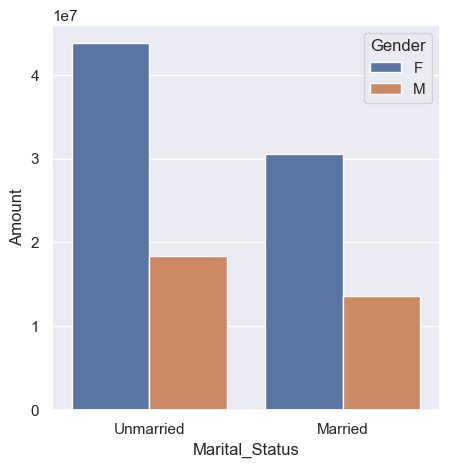

In [63]:
#plotting bar graph for Amount against  Marital_Status and Gender 
sns.set(rc={"figure.figsize":(5,5)})
sns.barplot(data=sales_state, x="Marital_Status",y="Amount",hue="Gender")

In [64]:
#From above graphs we can see that most of the buyers are unmarried (women).

In [65]:
#similarly total amount for occupations
sales_state=dfdiwali.groupby(["Occupation"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

In [66]:
sales_state

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


<Axes: xlabel='Occupation', ylabel='Amount'>

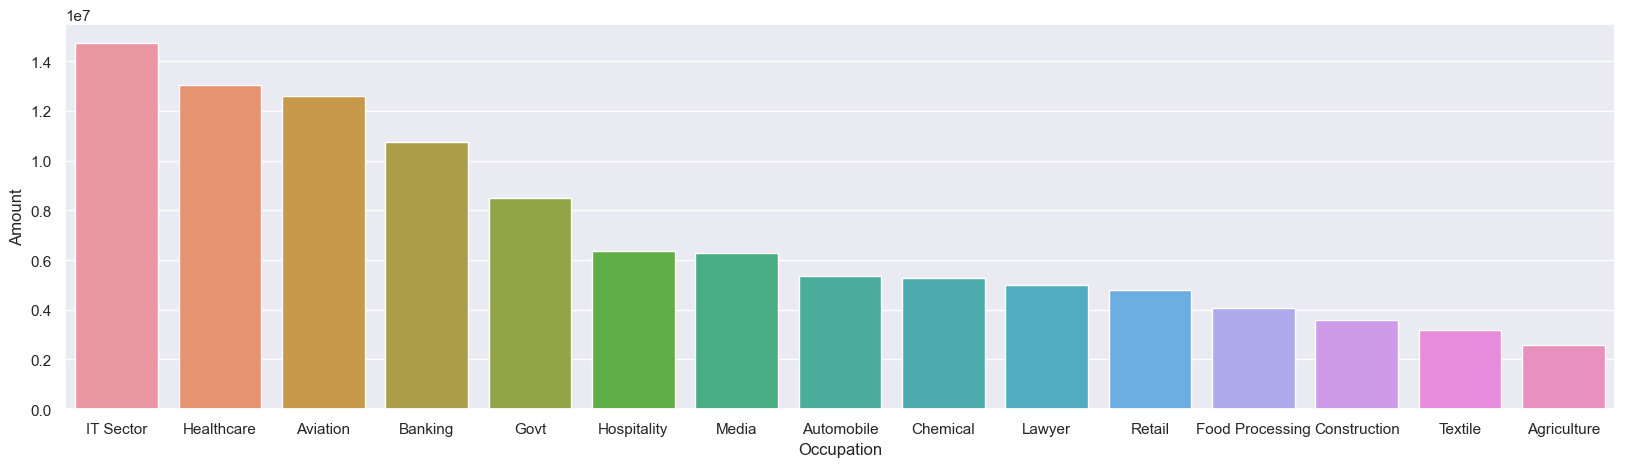

In [67]:
#plotting total amount for each occupation
sns.set(rc={"figure.figsize":(20,5)})
sns.barplot(data=sales_state, x="Occupation",y="Amount")

In [68]:
#From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector



In [69]:
#Total amount based on Product Categories
sales_status=dfdiwali.groupby(["Product_Category"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)

In [70]:
sales_status

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


<Axes: xlabel='Product_Category', ylabel='Amount'>

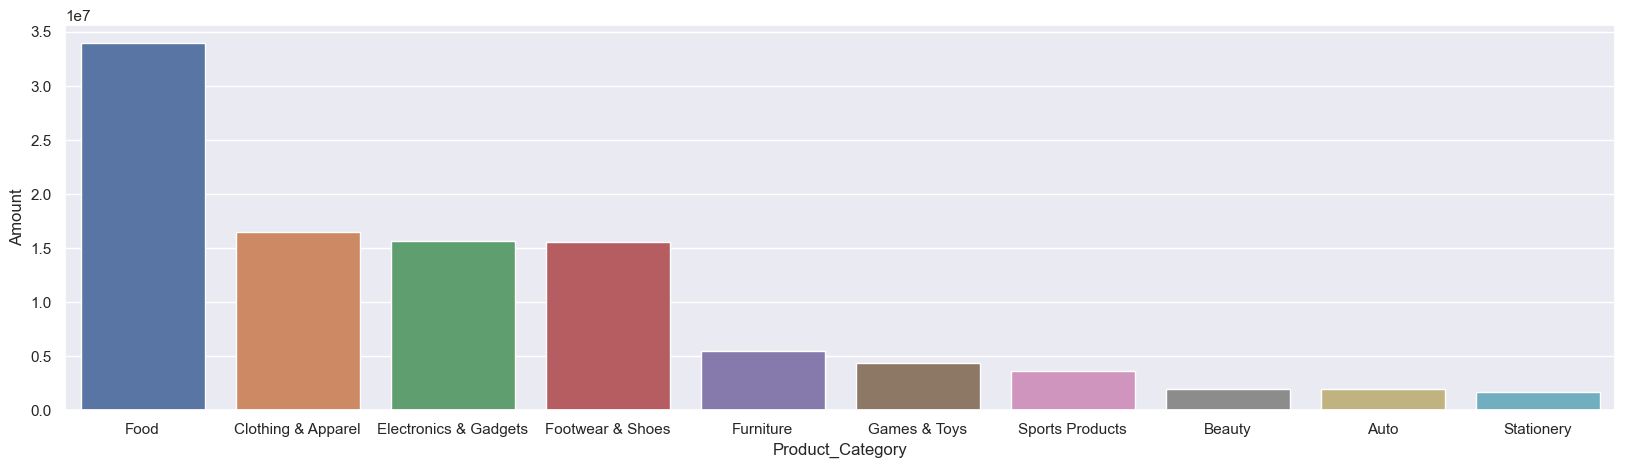

In [71]:
#plotting bar graph for total amount sold for each category
sns.set(rc={"figure.figsize":(20,5)})
sns.barplot(data=sales_status, x="Product_Category",y="Amount")

In [72]:
#From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category.

####  Basic Conclusion:
Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.

Note: many more conclusions could have been derived from the dataset(eg: top spending customers, product likelyhood etc. by creating new segments using different combinations of columns). 